# IDEA:
Young riders take longer trips than the rest riders
# Null Hypothesis:
The ratio of long distance trips by young riders to all distance trips by young riders is less than or equal to the ratio of long distance trips by all population to all distance trips by the rest of the population.

$$H0: Ly/Sy-Lx/Sx<=0$$
# Alternative Hypothesis:
Ha: The ratio of long distance trips by young riders to all distance trips by young riders is greater than the ratio of long distance trips by all population to all distance trips by the rest of the population.

$$Ha: Ly/Sy-Lx/Sx>0$$
#I will use a significanve level 0.05

# I am starting with a single month of data:
## reading data from citibike csv file from June 2016

In [119]:
#set working environment packages
from zipfile import ZipFile
from StringIO import StringIO
import urllib2
import pandas as pd
import os
from scipy import stats
import scipy.stats
import geopy
from geopy.distance import vincenty

In [112]:
#import data to workspace

PUIDATA = os.getenv('PUIDATA')
data = pd.read_csv(PUIDATA + '/201606-citibike-tripdata.csv')

#data = pd.read_csv(citibikedata)
data.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1470,6/1/2016 00:00:18,6/1/2016 00:24:48,380,W 4 St & 7 Ave S,40.734011,-74.002939,3236,W 42 St & Dyer Ave,40.758985,-73.993800,19859,Subscriber,1972.0,1
1,229,6/1/2016 00:00:20,6/1/2016 00:04:09,3092,Berry St & N 8 St,40.719009,-73.958525,3103,N 11 St & Wythe Ave,40.721533,-73.957824,16233,Subscriber,1967.0,1
2,344,6/1/2016 00:00:21,6/1/2016 00:06:06,449,W 52 St & 9 Ave,40.764618,-73.987895,469,Broadway & W 53 St,40.763441,-73.982681,22397,Subscriber,1989.0,1
3,1120,6/1/2016 00:00:28,6/1/2016 00:19:09,522,E 51 St & Lexington Ave,40.757148,-73.972078,401,Allen St & Rivington St,40.720196,-73.989978,16231,Subscriber,1991.0,1
4,229,6/1/2016 00:00:53,6/1/2016 00:04:42,335,Washington Pl & Broadway,40.729039,-73.994046,285,Broadway & E 14 St,40.734546,-73.990741,15400,Subscriber,1989.0,1


## Index in the above data that we need is:  'start station latitude', 'start station longitude', 'end station latitude', 'end station longitude', 'birth year'.

In [113]:
import pandas as pd
data = data.loc[:,["start station latitude","start station longitude","end station latitude","end station longitude","birth year"]]
data.head()

,start station latitude,start station longitude,end station latitude,end station longitude,birth year
0,40.734011,-74.002939,40.758985,-73.993800,1972.0
1,40.719009,-73.958525,40.721533,-73.957824,1967.0
2,40.764618,-73.987895,40.763441,-73.982681,1989.0
3,40.757148,-73.972078,40.720196,-73.989978,1991.0
4,40.729039,-73.994046,40.734546,-73.990741,1989.0


In [114]:
len(data)

1460318

## with data in the first four column, we need to generate a new column with coordinate content:

In [115]:
data.loc[:,"start_location"] = "(" + data["start station latitude"].map(str) + "," + " " + data["start station longitude"].map(str) + ")"
data.loc[:,"stop_location"] = "(" + data["end station latitude"].map(str) + "," + " " + data["end station longitude"].map(str) + ")"
data.loc[:,"start_location"] = data.loc[:,"start_location"].map(eval)
data.loc[:,"stop_location"] = data.loc[:,"stop_location"].map(eval)

In [116]:
data1 = data.drop(data.columns[[0,1,2,3]],1)
data1.head()

,birth year,start_location,stop_location
0,1972.0,"(40.73401143, -74.00293877)","(40.758984814, -73.9937996864)"
1,1967.0,"(40.7190095, -73.95852515)","(40.72153267, -73.95782357)"
2,1989.0,"(40.76461837, -73.98789473)","(40.76344058, -73.98268129)"
3,1991.0,"(40.75714758, -73.97207836)","(40.72019576, -73.98997825)"
4,1989.0,"(40.72903917, -73.99404649)","(40.73454567, -73.99074142)"


## find distance from location information:

In [117]:
#find distance from decimal degrees using geopy
#consider riders less than 65 years old
data2 = data1[data1["birth year"] > 1951]
len(data1)

1460318

In [120]:
#create function calculating distance from coordinate form
def dist_newdata(df):
    return vincenty(df["start_location"],df["stop_location"]).miles

data2.loc[:,"distance"] = data2.apply(dist_newdata, axis=1)

In [121]:
data3 = data2.drop(data2.columns[[1,2]],1)
data3.head()

,birth year,distance
0,1972.0,1.788728
1,1967.0,0.177958
2,1989.0,0.285343
3,1991.0,2.717342
4,1989.0,0.417694


In [122]:
data3["distance"].mean()

1.1631368762231453

## here we define 'long distance trips' by trips of distance greater than 3 miles from start location to end location.

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['all']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


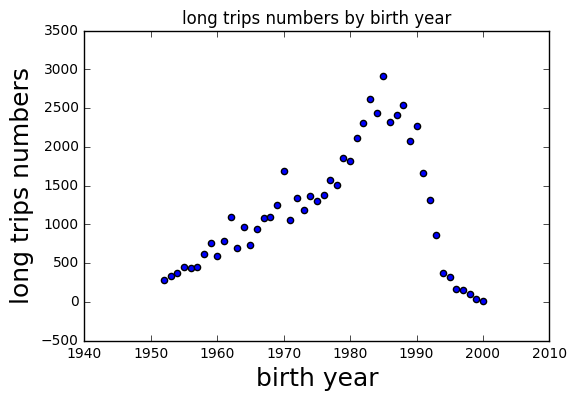

In [123]:
import matplotlib.pyplot as plt
import pylab as pl
%pylab inline
#create a new data set of 'long distance trip'
data4_long = data3[data3["distance"] >3]

#group data by birth year of just data4_long dataset
count_per_birth_year =data4_long["distance"].groupby(data4_long["birth year"]).count()
fig = plt.figure()
plt.scatter(count_per_birth_year.index , count_per_birth_year.values) 
plt.xlabel('birth year', fontsize=18)
plt.ylabel('long trips numbers', fontsize = 18)
plt.title('long trips numbers by birth year')

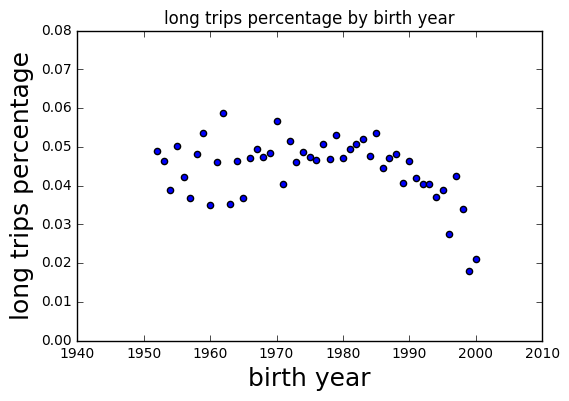

In [124]:
#group data by birth year, all data 
count_per_birth_year_all = data3["distance"].groupby(data3["birth year"]).count()
#normalize data
count_per_birth_normalized = count_per_birth_year / count_per_birth_year_all

#visualize long trip percentage for each year index 
fig = plt.figure()
plt.scatter(count_per_birth_normalized.index,count_per_birth_normalized.values)
plt.xlabel('birth year', fontsize=18)
plt.ylabel('long trips percentage', fontsize = 18)
plt.title('long trips percentage by birth year')

# From the two plots, we can hypothesize that long trips percentage among young riders is higher than the rest.

Define young riders: birth year index >= 1980 (millenials)
Define total riders: 1951 <= t > 1980 (working population, not typically retired)
Define long distance trips: greater than 3 miles from start to end station

Hypothesis is stated at the top.

## now considering z-test:
$\alpha = 0.05$

In [126]:
# build a new dataframe with trip numbers and long-distance trip numbers in each birth year.
count_per_birth_year =data4_long["distance"].groupby(data4_long["birth year"]).count()
long_trips = pd.DataFrame(count_per_birth_year.index , count_per_birth_year.values)

all_count_per_birth_year =data3["distance"].groupby(data3["birth year"]).count()
all_trips = pd.DataFrame(all_count_per_birth_year.values, all_count_per_birth_year.index)
long_trips = pd.DataFrame(np.array(long_trips.index), long_trips['birth year'])

In [127]:
all_trips['long trips'] = long_trips.iloc[:,0]
all_trips['long trips ratio'] = all_trips['long trips'] / all_trips[0]
all_trips.head()

,0,long trips,long trips ratio
birth year,,,
1952.0,5722,280,0.048934
1953.0,7255,337,0.046451
1954.0,9422,366,0.038845
1955.0,8948,449,0.050179
1956.0,10327,436,0.042219


In [128]:
# fetch trip data by young riders
young_trips = all_trips[all_trips.index >= 1980]

In [129]:
print (all_trips['long trips ratio'].mean())
print (all_trips['long trips ratio'].std())
print(young_trips['long trips ratio'].mean())
print(young_trips['long trips ratio'].std())

amean = all_trips['long trips ratio'].mean()
astd = all_trips['long trips ratio'].std()
ymean = young_trips['long trips ratio'].mean()
ystd = young_trips['long trips ratio'].std()

0.0443203503156
0.00808997795565
0.0413374354367
0.00957247002552


In [130]:
# calcute the z value
zvalue = (ymean - amean) / (ystd/math.sqrt(len(young_trips)))
print (zvalue)

-1.42799436169


In [131]:
# calculate p value
p_value = 1 - scipy.stats.norm.cdf(zvalue)
print p_value

0.923353259297


$p value = 0.923353259297 >> \alpha = 0.05$. 

So we don't reject null hypothesis.